# Coral Analysis

In [2]:
import turicreate

In [3]:
import re

In [4]:
# summary = turicreate.SFrame('crossrefSummary.csv')
summary = turicreate.SFrame('scholarSummary.csv')

Finished parsing file /home/liz/coral/scholarSummary.csv

Parsing completed. Parsed 85 lines in 0.017038 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/liz/coral/scholarSummary.csv

Parsing completed. Parsed 85 lines in 0.015238 secs.

In [58]:
summary = summary[summary['Abstract'] != None]  # only search documents where abstract was found

### Search text for all Acropora species (species list taken from Acropora Wiki)

In [6]:
species_list = []
with open('acroporaSpecies.txt', 'r') as f:
    text = f.read()
    species_list = re.findall('(?<=Acropora\s)[a-z]+', text) # pull out species names only

In [7]:
def searchSpecies(text):
    return {species: species in text for species in species_list}

In [10]:
summary['Species present'] = summary['Abstract'].apply(searchSpecies)
summary

ID,DOI,Title,Date
Science-Repository-Transforming-Growth- ...,10.31487/j.COR.2020.09.11,Transforming GrowthFactor Beta 1: Possible ...,"30 September, 2020"
2020.241-249,None,Characteristics ofAcropora divaricata and ...,07 February 2020
7-3-7-108,None,Staghorn coral (Genus-Acropora) of Elphinstone ...,None
Differential-bleaching-patterns-in-corals-of- ...,10.18520/cs/v114/i03/679-685 ...,Differential bleachingpatterns in corals of ...,None
Bioerosion-of-the-scleractinian-finger- ...,None,Bioerosion of thescleractinian finger ...,None
DESIGN-AND-IMPLEMENTATION-OF- ...,10.1175/1520-0426(2004)021<0331:NAMFRD>2.0.CO;2 ...,DESIGN AND IMPLEMENTATIONOF ELECTRONIC LOGGING ...,None
193957002,10.21789/22561498.1452,PDF generado a partir deXML-JATS4R ...,None
2020_Nielsen-etal-Physiological-effects ...,10.1007/s00338-019-01881-x) ...,Physiological effects ofheat and cold exposur ...,13 January 2020
Genotypic-inventory-of-Acropora-palmata-elkh ...,10.1007/s00227-003-1024-9,Genotypic inventory ofAcropora palmata (elk ...,January 2020
Acropora-Scleractinia-in-the-Middle-Eocene-of- ...,None,None,None


In [11]:
species_info = turicreate.SFrame({'Species': species_list})

# Count the number of papers referencing a given species based on the counts in summary['Species_Counts']
def totalPapersWithSpecies(species):
    return sum([dict[species] for dict in summary['Species present']])
  
species_info['Total papers'] = species_info['Species'].apply(totalPapersWithSpecies)

### Most Commonly Studied Species

In [12]:
species_info = species_info.sort('Total papers', ascending=False)

In [13]:
species_info

Species,Total papers
cervicornis,6
palmata,6
hyacinthus,6
humilis,5
millepora,4
branchi,4
muricata,4
aspera,3
digitifera,3
intermedia,2


In [14]:
sum(species_info['Total papers'] > 0)  # count how many species appear at all in any paper

26

### Search text for all proteins on Uniprot for Acropora

In [15]:
def simplifyProteinName(protein_name):
    protein_name = re.sub(' \(.*\)', '', protein_name)  # remove anything in parentheses, unlikely to match
    protein_name = re.sub('  ', ' ', protein_name)  # get rid of double spaces
    return protein_name

In [24]:
uniprot_sf = turicreate.SFrame.read_csv('uniprot-acropora.tab', '\t')
uniprot_sf = uniprot_sf['Protein names', 'Gene names'].unique()  # remove duplicates
uniprot_sf['Protein names'] = uniprot_sf['Protein names'].apply(simplifyProteinName)  # make names more searchable
uniprot_sf = uniprot_sf['Protein names', 'Gene names'].unique()
uniprot_sf = uniprot_sf.swap_columns('Protein names', 'Gene names')
uniprot_sf

Finished parsing file /home/liz/coral/uniprot-acropora.tab

Parsing completed. Parsed 100 lines in 0.016211 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/liz/coral/uniprot-acropora.tab

Parsing completed. Parsed 1202 lines in 0.018737 secs.

Protein names,Gene names
Skeletal aspartic acid-rich protein 1 ...,
Forkhead box L2 protein,AdiFoxL2
NADH:ubiquinone reductase,nad2
Mothers againstdecapentaplegic homolog ...,3 AdiSmad2
Nuclear receptor AmNR9,
Truncated PaxC,PaxC
Diencephalon/mesencephalon homeobox D protein ...,AdiDmbxD
Aristaless-like homeoboxprotein ...,AdiAlx
Red fluorescent protein-like Da2_12 ...,RFP-like
CBAH domain-containingprotein ...,


In [59]:
# Might need to think of a way to determine looser match... if can't think of rules,
# maybe manually create a list of general gene names that would be considered a match for a gene? 

def searchGenes(text):
    gene_dict = {}
    for gene in uniprot_sf:
        gene_name = gene['Gene names']
        protein_name = gene['Protein names']
        if re.search(protein_name, text) or gene_name and re.search(gene_name, text):
            gene_dict[protein_name] = True  # found match
        else:
            gene_dict[protein_name] = False
    return gene_dict    

In [60]:
summary['Genes present'] = summary['Abstract'].apply(searchGenes)
summary

ID,DOI,Title,Date
Science-Repository-Transforming-Growth- ...,10.31487/j.COR.2020.09.11,Transforming GrowthFactor Beta 1: Possible ...,"30 September, 2020"
2020.241-249,None,Characteristics ofAcropora divaricata and ...,07 February 2020
7-3-7-108,None,Staghorn coral (Genus-Acropora) of Elphinstone ...,None
Differential-bleaching-patterns-in-corals-of- ...,10.18520/cs/v114/i03/679-685 ...,Differential bleachingpatterns in corals of ...,None
Bioerosion-of-the-scleractinian-finger- ...,None,Bioerosion of thescleractinian finger ...,None
DESIGN-AND-IMPLEMENTATION-OF- ...,10.1175/1520-0426(2004)021<0331:NAMFRD>2.0.CO;2 ...,DESIGN AND IMPLEMENTATIONOF ELECTRONIC LOGGING ...,None
2020_Nielsen-etal-Physiological-effects ...,10.1007/s00338-019-01881-x) ...,Physiological effects ofheat and cold exposur ...,13 January 2020
Genotypic-inventory-of-Acropora-palmata-elkh ...,10.1007/s00227-003-1024-9,Genotypic inventory ofAcropora palmata (elk ...,January 2020
rachel_sandquist_poster,10.1186/1750-2187-8-7,None,None
245731,None,None,None


In [30]:
def totalPapersWithGene(gene):
    return sum(dict[gene] for dict in summary['Genes present'])

In [32]:
gene_info = uniprot_sf
gene_info['Total papers'] = gene_info['Protein names'].apply(totalPapersWithGene)
gene_info.sort('Total papers', ascending=False)

Protein names,Gene names,Total papers
Zinc finger transcriptionfactor ...,snail,2
Thioredoxin reductase,TR,2
Brachyury protein,Bra,1
Actin,,1
Complement C3,C3,1
TSP-1 and VWA domain-containing protein ...,,0
Mucin4-like protein,,0
SoxF,,0
Selenoprotein I,SelI,0
Zona pellucida domain-containing protein ...,,0


## TF-IDF K-Means Clustering and Nearest Neighbors
### (interesting though maybe not useful)

In [33]:
def wordsOnly(text):
    text = re.sub(',', ' ', text)
    text = re.sub('[^a-zA-Z\s]', '', text)
    return text

In [34]:
summary = summary[summary['Language'] == 'en']
summary['Abstract_Words_Only'] = summary['Abstract'].apply(wordsOnly)

In [35]:
summary['tfidf'] = turicreate.text_analytics.tf_idf(summary['Abstract_Words_Only'])
summary['tfidf']

dtype: dict
Rows: 68
[{'by': 0.4128452154057869, 'regarding': 3.5263605246161616, 'childhood': 4.219507705176107, 'demonstrated': 4.219507705176107, 'this': 0.3693601034660482, 'presented': 2.6100697927420065, 'remission': 8.439015410352214, 'treatment': 6.241790833015994, 'notably': 4.219507705176107, 'comparing': 4.219507705176107, 'lower': 2.2735975561207935, 'compared': 1.329135947279942, 'concentration': 3.120895416507997, 'decreased': 2.6100697927420065, 'however': 1.3862943611198906, 'did': 2.833213344056216, 'their': 1.2750687260096663, 'relapse': 4.219507705176107, 'or': 1.2750687260096663, 'suggests': 2.833213344056216, 'with': 0.32768740706548005, 'alter': 3.5263605246161616, 'not': 2.4475508632442313, 'were': 1.0118712769435978, 'both': 1.329135947279942, 'stages': 4.219507705176107, 'risk': 3.5263605246161616, 'its': 1.65455834771457, 'deregulated': 4.219507705176107, 'been': 1.65455834771457, 'concerning': 4.219507705176107, 'groups': 2.833213344056216, 'gene': 2.61006979

### Determine which article is the nearest neighbor of a given article (based on TF-IDF in abstract)

In [36]:
nn_model = turicreate.nearest_neighbors.create(summary, features=['tfidf'], label='ID')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [37]:
nn_model.query(summary[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 1.47059     | 443us        |

| Done         |         | 100         | 5.203ms      |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Science-Repository-Transforming-Growth- ...,0.0,1
0,2020.241-249,0.8804347826086957,2
0,Increased-density-of-the-corallivore-Drupella- ...,0.8813559322033898,3
0,THE-SIGNIFICANCE-OF-RAINFALL-AND-WATER- ...,0.8869047619047619,4
0,EEC-5,0.8888888888888888,5


### Plot SSE to determine reasonable number of clusters

In [38]:
sses = []
for k in range(1, len(summary)):
    model = turicreate.kmeans.create(summary, features=['tfidf'], num_clusters=k)
    sses.append(sum(model.cluster_info['sum_squared_distance']))

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 34        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 52        |

| 1             | 32        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 20        |

| 1             | 19        |

| 2             | 41        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 39        |

| 1             | 61        |

| 2             | 44        |

| 3             | 29        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 32        |

| 1             | 23        |

| 2             | 29        |

| 3             | 54        |

| 4             | 61        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 62        |

| 1             | 65        |

| 2             | 32        |

| 3             | 40        |

| 4             | 44        |

| 5             | 37        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 29        |

| 1             | 39        |

| 2             | 1         |

| 3             | 43        |

| 4             | 48        |

| 5             | 9         |

| 6             | 22        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 2                             |

| 2         | 1                             |

| 3         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 33        |

| 1             | 40        |

| 2             | 12        |

| 3             | 5         |

| 4             | 30        |

| 5             | 58        |

| 7             | 15        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 54        |

| 1             | 53        |

| 2             | 60        |

| 3             | 26        |

| 4             | 47        |

| 5             | 40        |

| 8             | 13        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 46        |

| 1             | 61        |

| 2             | 57        |

| 3             | 33        |

| 4             | 34        |

| 5             | 40        |

| 9             | 3         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 53        |

| 1             | 63        |

| 2             | 30        |

| 3             | 5         |

| 4             | 61        |

| 5             | 8         |

| 10            | 14        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 13        |

| 1             | 56        |

| 2             | 18        |

| 3             | 5         |

| 4             | 40        |

| 5             | 61        |

| 10            | 19        |

| 11            | 46        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 15        |

| 1             | 17        |

| 2             | 32        |

| 3             | 51        |

| 4             | 1         |

| 5             | 57        |

| 10            | 10        |

| 12            | 4         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 30        |

| 1             | 49        |

| 2             | 8         |

| 3             | 25        |

| 4             | 63        |

| 5             | 61        |

| 10            | 52        |

| 13            | 36        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 1                             |

| 2         | 1                             |

| 3         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 5         |

| 1             | 30        |

| 2             | 25        |

| 3             | 66        |

| 4             | 12        |

| 5             | 54        |

| 10            | 42        |

| 14            | 45        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 65        |

| 1             | 54        |

| 2             | 61        |

| 3             | 44        |

| 4             | 32        |

| 5             | 25        |

| 10            | 4         |

| 15            | 14        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 58        |

| 1             | 29        |

| 2             | 37        |

| 3             | 5         |

| 4             | 51        |

| 5             | 62        |

| 10            | 26        |

| 16            | 25        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 39        |

| 1             | 26        |

| 2             | 48        |

| 3             | 55        |

| 4             | 20        |

| 5             | 61        |

| 10            | 29        |

| 17            | 30        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 57        |

| 1             | 1         |

| 2             | 16        |

| 3             | 34        |

| 4             | 40        |

| 5             | 61        |

| 10            | 44        |

| 18            | 54        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 65        |

| 1             | 31        |

| 2             | 44        |

| 3             | 61        |

| 4             | 63        |

| 5             | 53        |

| 10            | 54        |

| 19            | 8         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 48        |

| 1             | 6         |

| 2             | 55        |

| 3             | 24        |

| 4             | 61        |

| 5             | 67        |

| 10            | 16        |

| 20            | 13        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 27        |

| 1             | 9         |

| 2             | 25        |

| 3             | 61        |

| 4             | 52        |

| 5             | 42        |

| 10            | 56        |

| 21            | 11        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 36        |

| 1             | 61        |

| 2             | 2         |

| 3             | 57        |

| 4             | 8         |

| 5             | 54        |

| 10            | 21        |

| 22            | 29        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 61        |

| 1             | 18        |

| 2             | 4         |

| 3             | 57        |

| 4             | 15        |

| 5             | 40        |

| 10            | 20        |

| 23            | 31        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 7         |

| 1             | 61        |

| 2             | 46        |

| 3             | 67        |

| 4             | 54        |

| 5             | 21        |

| 10            | 10        |

| 24            | 53        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 1                             |

| 2         | 1                             |

| 3         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 17        |

| 1             | 65        |

| 2             | 32        |

| 3             | 9         |

| 4             | 66        |

| 5             | 54        |

| 10            | 48        |

| 25            | 12        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 9         |

| 1             | 44        |

| 2             | 59        |

| 3             | 36        |

| 4             | 40        |

| 5             | 53        |

| 10            | 46        |

| 26            | 62        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 27        |

| 1             | 51        |

| 2             | 49        |

| 3             | 63        |

| 4             | 42        |

| 5             | 61        |

| 10            | 66        |

| 27            | 21        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 60        |

| 1             | 3         |

| 2             | 40        |

| 3             | 63        |

| 4             | 61        |

| 5             | 39        |

| 10            | 35        |

| 28            | 57        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 59        |

| 1             | 22        |

| 2             | 60        |

| 3             | 61        |

| 4             | 50        |

| 5             | 53        |

| 10            | 8         |

| 29            | 24        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 16        |

| 1             | 65        |

| 2             | 57        |

| 3             | 5         |

| 4             | 37        |

| 5             | 19        |

| 10            | 1         |

| 30            | 42        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 45        |

| 1             | 37        |

| 2             | 63        |

| 3             | 62        |

| 4             | 12        |

| 5             | 8         |

| 10            | 19        |

| 31            | 59        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 30        |

| 1             | 18        |

| 2             | 7         |

| 3             | 4         |

| 4             | 24        |

| 5             | 44        |

| 10            | 14        |

| 32            | 37        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 24        |

| 1             | 14        |

| 2             | 1         |

| 3             | 4         |

| 4             | 56        |

| 5             | 0         |

| 10            | 55        |

| 33            | 27        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 58        |

| 1             | 24        |

| 2             | 63        |

| 3             | 57        |

| 4             | 65        |

| 5             | 29        |

| 10            | 34        |

| 34            | 25        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 26        |

| 1             | 4         |

| 2             | 25        |

| 3             | 7         |

| 4             | 10        |

| 5             | 19        |

| 10            | 40        |

| 35            | 28        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 64        |

| 1             | 54        |

| 2             | 61        |

| 3             | 36        |

| 4             | 63        |

| 5             | 18        |

| 10            | 27        |

| 36            | 41        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 21        |

| 1             | 29        |

| 2             | 50        |

| 3             | 36        |

| 4             | 24        |

| 5             | 66        |

| 10            | 4         |

| 37            | 34        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 63        |

| 1             | 61        |

| 2             | 39        |

| 3             | 54        |

| 4             | 44        |

| 5             | 6         |

| 10            | 65        |

| 38            | 46        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 24        |

| 1             | 32        |

| 2             | 40        |

| 3             | 20        |

| 4             | 61        |

| 5             | 10        |

| 10            | 63        |

| 39            | 33        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 10        |

| 1             | 8         |

| 2             | 24        |

| 3             | 44        |

| 4             | 61        |

| 5             | 12        |

| 10            | 63        |

| 40            | 46        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 62        |

| 1             | 29        |

| 2             | 41        |

| 3             | 61        |

| 4             | 18        |

| 5             | 44        |

| 10            | 54        |

| 41            | 35        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 41        |

| 1             | 67        |

| 2             | 38        |

| 3             | 63        |

| 4             | 11        |

| 5             | 50        |

| 10            | 9         |

| 42            | 16        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 20        |

| 1             | 24        |

| 2             | 62        |

| 3             | 18        |

| 4             | 61        |

| 5             | 17        |

| 10            | 63        |

| 43            | 26        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 42        |

| 1             | 11        |

| 2             | 61        |

| 3             | 4         |

| 4             | 63        |

| 5             | 40        |

| 10            | 2         |

| 44            | 52        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 7         |

| 1             | 16        |

| 2             | 50        |

| 3             | 64        |

| 4             | 4         |

| 5             | 51        |

| 10            | 6         |

| 45            | 65        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 9         |

| 1             | 22        |

| 2             | 17        |

| 3             | 32        |

| 4             | 19        |

| 5             | 8         |

| 10            | 15        |

| 46            | 59        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 66        |

| 1             | 61        |

| 2             | 46        |

| 3             | 50        |

| 4             | 40        |

| 5             | 26        |

| 10            | 1         |

| 47            | 28        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 19        |

| 1             | 54        |

| 2             | 52        |

| 3             | 63        |

| 4             | 21        |

| 5             | 24        |

| 10            | 13        |

| 48            | 18        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 46        |

| 1             | 31        |

| 2             | 23        |

| 3             | 41        |

| 4             | 61        |

| 5             | 15        |

| 10            | 32        |

| 49            | 34        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 49        |

| 1             | 38        |

| 2             | 27        |

| 3             | 0         |

| 4             | 55        |

| 5             | 25        |

| 10            | 37        |

| 50            | 10        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 7         |

| 1             | 61        |

| 2             | 46        |

| 3             | 67        |

| 4             | 6         |

| 5             | 5         |

| 10            | 0         |

| 50            | 59        |

| 51            | 30        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 1         |

| 1             | 31        |

| 2             | 44        |

| 3             | 46        |

| 4             | 18        |

| 5             | 51        |

| 10            | 14        |

| 50            | 48        |

| 52            | 30        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 33        |

| 1             | 18        |

| 2             | 39        |

| 3             | 63        |

| 4             | 29        |

| 5             | 43        |

| 10            | 35        |

| 50            | 37        |

| 53            | 15        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 28        |

| 1             | 4         |

| 2             | 36        |

| 3             | 49        |

| 4             | 1         |

| 5             | 59        |

| 10            | 6         |

| 50            | 38        |

| 54            | 5         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 38        |

| 1             | 45        |

| 2             | 27        |

| 3             | 1         |

| 4             | 44        |

| 5             | 14        |

| 10            | 4         |

| 50            | 28        |

| 55            | 2         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 54        |

| 1             | 6         |

| 2             | 30        |

| 3             | 9         |

| 4             | 29        |

| 5             | 32        |

| 10            | 44        |

| 50            | 38        |

| 56            | 22        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 54        |

| 1             | 31        |

| 2             | 14        |

| 3             | 30        |

| 4             | 27        |

| 5             | 49        |

| 10            | 21        |

| 50            | 41        |

| 57            | 23        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 27        |

| 1             | 22        |

| 2             | 6         |

| 3             | 8         |

| 4             | 62        |

| 5             | 53        |

| 10            | 24        |

| 50            | 19        |

| 58            | 13        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 0         |

| 1             | 31        |

| 2             | 44        |

| 3             | 4         |

| 4             | 61        |

| 5             | 34        |

| 10            | 30        |

| 50            | 9         |

| 59            | 64        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 39        |

| 1             | 23        |

| 2             | 0         |

| 3             | 64        |

| 4             | 16        |

| 5             | 63        |

| 10            | 2         |

| 50            | 57        |

| 60            | 9         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 24        |

| 1             | 50        |

| 2             | 46        |

| 3             | 19        |

| 4             | 61        |

| 5             | 48        |

| 10            | 32        |

| 50            | 12        |

| 61            | 11        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 43        |

| 1             | 61        |

| 2             | 1         |

| 3             | 46        |

| 4             | 42        |

| 5             | 20        |

| 10            | 54        |

| 50            | 52        |

| 62            | 19        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 58        |

| 1             | 51        |

| 2             | 62        |

| 3             | 63        |

| 4             | 32        |

| 5             | 59        |

| 10            | 18        |

| 50            | 28        |

| 63            | 38        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 31        |

| 1             | 38        |

| 2             | 57        |

| 3             | 56        |

| 4             | 34        |

| 5             | 54        |

| 10            | 63        |

| 50            | 51        |

| 64            | 55        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 65        |

| 1             | 44        |

| 2             | 46        |

| 3             | 9         |

| 4             | 24        |

| 5             | 16        |

| 10            | 14        |

| 50            | 62        |

| 65            | 28        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 18        |

| 1             | 30        |

| 2             | 36        |

| 3             | 61        |

| 4             | 34        |

| 5             | 16        |

| 10            | 33        |

| 50            | 22        |

| 66            | 23        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

In [39]:
from matplotlib import pyplot as plt

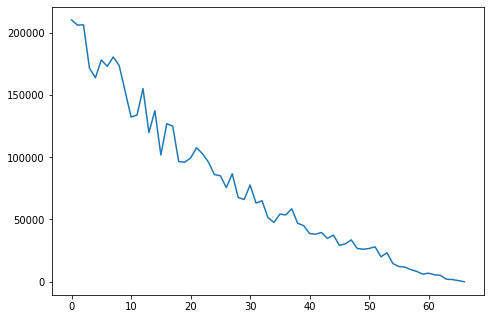

In [40]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(range(len(sses)),sses)

### Manually choose k, perform K-Means clustering

In [55]:
k = 15
kmeans_model = turicreate.kmeans.create(summary, features=['tfidf'], num_clusters=k)

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 62        |

| 1             | 45        |

| 2             | 55        |

| 3             | 63        |

| 4             | 24        |

| 5             | 44        |

| 10            | 10        |

| 14            | 39        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

In [56]:
kmeans_model.cluster_info.print_rows(num_rows=k)

+-------------------------------+------------+------+----------------------+
|             tfidf             | cluster_id | size | sum_squared_distance |
+-------------------------------+------------+------+----------------------+
| {'a': 2.3052365861183235, ... |     0      |  1   |         0.0          |
| {'a': 0.11526182930591618,... |     1      |  2   |  769.5118408203125   |
| {'a': 0.6698234608721167, ... |     2      |  53  |  146310.2216644287   |
| {'a': 0.9220946344473294, ... |     3      |  1   |         0.0          |
| {'a': 1.1526182930591617, ... |     4      |  1   |         0.0          |
| {'a': 3.4578548791774852, ... |     5      |  1   |         0.0          |
| {'a': 1.1526182930591617, ... |     6      |  1   |         0.0          |
| {'a': 0.23052365861183235,... |     7      |  1   |         0.0          |
| {'access': 4.2195077051761... |     8      |  1   |         0.0          |
| {'a': 0.9220946344473294, ... |     9      |  1   |         0.0          |

### What are the top 10 words defining a cluster?

In [57]:
info = kmeans_model.cluster_info
for k in range(0, len(info)):
    cluster = info[info['cluster_id'] == k]
    top_words_tfidf = cluster[['tfidf']].stack('tfidf', new_column_name=['word','tfidf']).sort('tfidf', ascending=False)
    top_words = top_words_tfidf['word'][0:10]
    print(f"Cluster {k}")
    print(top_words)

Cluster 0
['dmsp', 'indirect', 'hsgcms', 'store', 'aspera', 'concentrations', 'gave', 'dms', 'chromatography', 'lcms']
Cluster 1
['belitung', 'bangka', 'island', 'islands', 'tin', 'threatened', 'coastal', 'mining', 'mangrove', 'seagrass']
Cluster 2
['semantic', 'corals', 'gulf', 'bleaching', 'w', 'were', 'space', 'at', 'm', 'growth']
Cluster 3
['radial', 'corallites', 'coenosteum', 'atlantic', 'spinules', 'sized', 'evenly', 'simple', 'tubular', 'branch']
Cluster 4
['introgression', 'evolutionary', 'roles', 'chapter', 'duplication', 'i', 'diversification', 'dominance', 'rise', 'genome']
Cluster 5
['srca', 'interbranch', 'climate', 'reconstructions', 'cores', 'gbr', 'porites', 'skeleton', 'reconstruction', 'slope']
Cluster 6
['methylation', 'epigenetic', 'dna', 'changes', 'variation', 'modifications', 'seasonal', 'responses', 'consistent', 'these']
Cluster 7
['setosum', 'diadema', 'gonad', 'vitamin', 'compounds', 'elements', 'mg', 'nutrient', 'content', 'potency']
Cluster 8
['ne', 'nw', 